# Customer Purchase Analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pickle

In [2]:
cust_data = pd.read_csv(r'E:/Github/Datasets/purchase_data.csv', index_col=0)

In [3]:
cust_data.head()

,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,,,,,,,,,,,,,,,
200000001,1,0,0,0,0,0,1.59,1.87,2.01,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,11,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,12,0,0,0,0,0,1.51,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,16,0,0,0,0,0,1.52,1.89,1.98,2.09,...,0,0,0,0,0,47,1,110866,1,0
200000001,18,0,0,0,0,0,1.52,1.89,1.99,2.09,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58693 entries, 200000001 to 200000500
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Day                58693 non-null  int64  
 1   Incidence          58693 non-null  int64  
 2   Brand              58693 non-null  int64  
 3   Quantity           58693 non-null  int64  
 4   Last_Inc_Brand     58693 non-null  int64  
 5   Last_Inc_Quantity  58693 non-null  int64  
 6   Price_1            58693 non-null  float64
 7   Price_2            58693 non-null  float64
 8   Price_3            58693 non-null  float64
 9   Price_4            58693 non-null  float64
 10  Price_5            58693 non-null  float64
 11  Promotion_1        58693 non-null  int64  
 12  Promotion_2        58693 non-null  int64  
 13  Promotion_3        58693 non-null  int64  
 14  Promotion_4        58693 non-null  int64  
 15  Promotion_5        58693 non-null  int64  
 16  Sex       

In [5]:
cust_data.isnull().sum()

Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

In [6]:
scaler = pickle.load(open('scaler.pickle', 'rb'))
pca = pickle.load(open('pca.pickle', 'rb'))
kmeans_pca = pickle.load(open('kmeans_model_pca.pickle', 'rb'))

In [7]:
cust_data.columns

Index(['Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [19]:
starting_index = int(np.where(cust_data.columns == 'Sex')[0])
starting_index

16

In [22]:
cols_to_use = cust_data.columns[starting_index:].tolist()
print(cols_to_use)

['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']


In [23]:
purchase_df_std = scaler.transform(cust_data[cols_to_use])

In [24]:
purchase_df_std_pca = pca.transform(purchase_df_std)

In [25]:
purchase_segment_kmeans_pca = kmeans_pca.predict(purchase_df_std_pca)

In [27]:
cust_data['Segment'] = purchase_segment_kmeans_pca

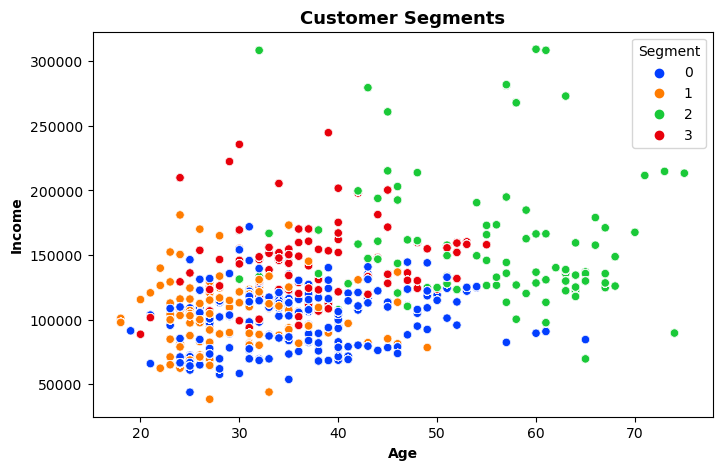

In [28]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = 'Age', y = 'Income', data = cust_data, palette = "bright", hue = 'Segment')
plt.title('Customer Segments', fontsize = 13, fontweight="bold")
plt.xlabel('Age', fontweight="bold")
plt.ylabel('Income', fontweight="bold");

### Descriptive Analysis by Segments

In [31]:
cust_data = cust_data.reset_index()
cust_data.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,0


In [34]:
temp1 = cust_data[['ID', 'Incidence']].groupby('ID', as_index = False).count()
temp1.rename(columns={'Incidence':"N_visits"}, inplace = True)
temp1.head()

,ID,N_visits
0,200000001,101
1,200000002,87
2,200000003,97
3,200000004,85
4,200000005,111


In [36]:
temp2 = cust_data[['ID', 'Incidence']].groupby('ID', as_index = False).sum()
temp2.rename(columns={'Incidence':"N_purchase"}, inplace = True)
temp2.head()

,ID,N_purchase
0,200000001,9
1,200000002,11
2,200000003,10
3,200000004,11
4,200000005,13


In [46]:
temp3 = temp1.merge(temp2, on = 'ID', how = 'left')
temp3.head()

,ID,N_visits,N_purchase
0,200000001,101,9
1,200000002,87,11
2,200000003,97,10
3,200000004,85,11
4,200000005,111,13


In [47]:
temp3.isna().sum()

ID            0
N_visits      0
N_purchase    0
dtype: int64

In [49]:
temp3['Avg_purchase'] = temp3['N_purchase'] / temp3['N_visits']
temp3.head()

,ID,N_visits,N_purchase,Avg_purchase
0,200000001,101,9,0.089109
1,200000002,87,11,0.126437
2,200000003,97,10,0.103093
3,200000004,85,11,0.129412
4,200000005,111,13,0.117117


In [56]:
temp4 = cust_data[['ID', 'Segment']].groupby('ID', as_index = False).mean()
temp4.head()

,ID,Segment
0,200000001,0.0
1,200000002,2.0
2,200000003,0.0
3,200000004,0.0
4,200000005,3.0


In [58]:
purchase_descriptive_df = temp4.merge(temp3, on = "ID")
purchase_descriptive_df.head()

,ID,Segment,N_visits,N_purchase,Avg_purchase
0,200000001,0.0,101,9,0.089109
1,200000002,2.0,87,11,0.126437
2,200000003,0.0,97,10,0.103093
3,200000004,0.0,85,11,0.129412
4,200000005,3.0,111,13,0.117117


In [67]:
purchase_descriptive_df['Segment'].value_counts()

0    188
1    109
3    105
2     98
Name: Segment, dtype: int64

In [65]:
purchase_descriptive_df['Segment'] = purchase_descriptive_df['Segment'].astypeype('int64')
purchase_descriptive_df.head()

,ID,Segment,N_visits,N_purchase,Avg_purchase
0,200000001,0,101,9,0.089109
1,200000002,2,87,11,0.126437
2,200000003,0,97,10,0.103093
3,200000004,0,85,11,0.129412
4,200000005,3,111,13,0.117117


In [59]:
purchase_descriptive_df.isnull().any()

ID              False
Segment         False
N_visits        False
N_purchase      False
Avg_purchase    False
dtype: bool

### Segment Proportions

In [66]:
segm_prop = purchase_descriptive_df[['N_purchase', 'Segment']].groupby('Segment').count() / purchase_descriptive_df.shape[0]
segm_prop.rename(columns = {'N_purchase': 'Segment_Proportions'}, inplace = True)
segm_prop

,Segment_Proportions
Segment,
0,0.376
1,0.218
2,0.196
3,0.210


In [70]:
segm_prop['Segment_Proportions'].values

array([0.376, 0.218, 0.196, 0.21 ])

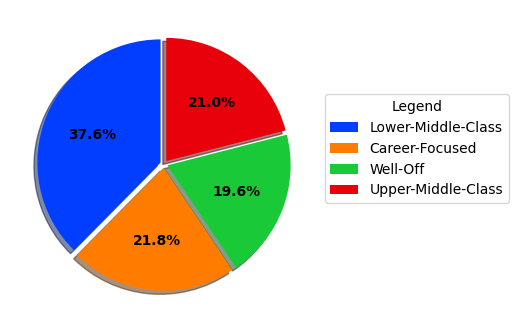

In [75]:
fig, ax = plt.subplots(figsize=[12,4])

labels = ['Lower-Middle-Class', 'Career-Focused', 'Well-Off', 'Upper-Middle-Class']
data = segm_prop['Segment_Proportions'].values
title = "Segment Proportions"
colors = sns.color_palette('bright')


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"

wedges, texts, autopcts = ax.pie(x= data, 
                                 autopct=lambda pct: func(pct, data), 
                                 explode=[0.03]*len(data), 
                                 shadow=True, 
                                 startangle = 90,
                                 colors = colors,
                                 radius=1
                                 )
# Adding legend
ax.legend(wedges, labels,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0.5, 1, 0.1))

plt.setp(autopcts, **{'color':'black', 'weight':'bold', 'fontsize':10});

### Purchase Occation and Purchase Incidence

In [78]:
segments_mean = purchase_descriptive_df.drop('ID', axis = 1).groupby('Segment').mean()
segments_mean

,N_visits,N_purchase,Avg_purchase
Segment,,,
0,114.053191,22.547872,0.198355
1,116.935780,25.100917,0.217425
2,117.295918,34.602041,0.284478
3,123.904762,40.685714,0.287304


In [79]:
segments_std = purchase_descriptive_df.drop('ID', axis = 1).groupby('Segment').std()
segments_std

,N_visits,N_purchase,Avg_purchase
Segment,,,
0,15.894281,13.267420,0.112502
1,19.810339,17.202468,0.136558
2,20.716152,25.900579,0.171787
3,45.719993,54.835298,0.202908


In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = purpose_index, y = purpose_values, palette = "bright", edgecolor='black')
ax.bar_label(ax.containers[0])
plt.title('Purpose of Loan Applied', fontsize = 13, fontweight="bold")
plt.xlabel('Purpose', fontweight="bold")
plt.ylabel('Count', fontweight="bold");